# K-Nearest Clustering -Scratch

Soyut Algoritma; 
1. Ağırlık merkezlerini başlatmak - Rastgele K nokta sayısı ile başlanır.
2. Kümeleri Atamak - Kümeler, merkezden uzaklıkları hesaplanarak, minimum mesafeler üzerinden ağırlık merkezine atanarak veri kümesindeki her noktaya atanır.
3. Ağırlık merkezlerini yeni etiketli veriler üzerinden tekrar hesaplamak - Güncellenmiş her kümenin ağırlık merkezinin tekrar hesaplanması ile ağırlık merkezi güncellenir.
![title](step1.png)
![title](step2.png)
![title](step3.png)
![title](step4.png)
![title](step5.png)
Kullanılacak olan öklid mesafe formülü.
![title](euclideanformula.png)
Algoritmadaki maliyet fonksiyonu.
Maliyet fonksiyonu, noktalardan kendi küme merkezlerine Öklid mesafelerinin toplamıdır.
![title](cost.png)
Optimum değere ulaşmak için J'yi küçültmek gerekiyor. Yani J'yi 2 değişkene göre art arda diferansiye edeceğiz. İlk adımda, xi veri noktası öklid mesafesine göre en yakın olan kendi centroid ci'sine atanır.
![title](first.png)
İkinci adımda, veri noktaları atandıktan sonra kümenin merkezini yeniden hesaplanması gerçekleştirilir.
![title](second.png)
Yukarıdaki iki adım, veri noktalarının optimal separasyon elde edene kadar yinelemeli olarak gerçekleştirilecektir.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=5, random_state=101)

In [24]:
X[:10] # 2 boyutlu inputlar

array([[ -4.95836863,   5.96425277],
       [-10.56433263,  -5.95908897],
       [  5.03973453,  -5.91474793],
       [ -4.24393374,   7.46294311],
       [  0.29639341,   2.06317757],
       [ -1.37811338,   0.25423232],
       [  3.74699958,   6.26688185],
       [  4.60888633,  -6.82802632],
       [ -9.2834887 ,  -7.04901491],
       [ -9.04448516,  -4.48554835]])

In [25]:
y[:10] # target, clustering algoritmada kullanılmayacaktır

array([3, 1, 4, 3, 0, 0, 2, 4, 1, 1])

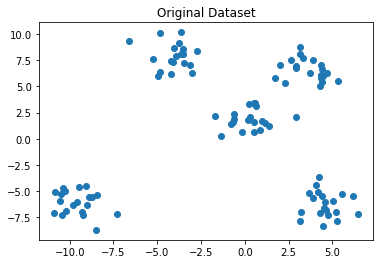

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.title('Original Dataset')
plt.show()

In [12]:
m=X.shape[0]
n=X.shape[1] 
n_iter=200
K=5

In [13]:
centroids=np.array([]).reshape(n,0) 

for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]

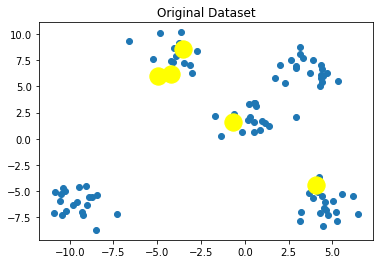

In [14]:
plt.scatter(X[:,0],X[:,1])
plt.title('Original Dataset')
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.show()

In [22]:
for i in range(n_iter):
      euclid_dists=np.array([]).reshape(m,0)
      for k in range(K):
          dist=np.sum((X-centroids[:,k])**2,axis=1)
          euclid_dists=np.c_[euclid_dists,dist]
      cmin=np.argmin(euclid_dists,axis=1)+1
      cent={}
      for k in range(K):
           cent[k+1]=np.array([]).reshape(2,0)
      for k in range(m):
           cent[cmin[k]]=np.c_[cent[cmin[k]],X[k]]
      for k in range(K):
           cent[k+1]=cent[k+1].T
      for k in range(K):
           centroids[:,k]=np.mean(cent[k+1],axis=0)
      final_cent=cent

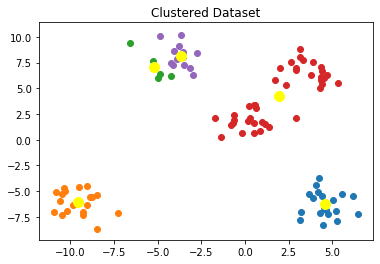

In [23]:
for k in range(K):
    plt.scatter(final_cent[k+1][:,0],final_cent[k+1][:,1])

plt.scatter(centroids[0,:],centroids[1,:],s=100,c='yellow')
plt.title('Clustered Dataset')
plt.show()